In [22]:
import tensorflow as np
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
%matplotlib inline

# Download the Data

In [2]:
# data initially from kaggle but I stored on mediafire so we could download easily
# about 300MB csv file
!echo Downloading...
!curl \
    "http://download1641.mediafire.com/6re9aw13xmjg/zc19w2kt8so0w64/fer2013.csv" \
    -O && echo Done downloading || echo Error occurred

Downloading...
Done downloading 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed



  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  287M    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  287M    0 2522k    0     0  2522k      0  0:01:56  0:00:01  0:01:55 1969k
  1  287M    1 5637k    0     0  2818k      0  0:01:44  0:00:02  0:01:42 2487k
  3  287M    3 8997k    0     0  2999k      0  0:01:38  0:00:03  0:01:35 2754k
  4  287M    4 12.7M    0     0  3260k      0  0:01:30  0:00:04  0:01:26 3057k
  5  287M    5 16.7M    0     0  3437k      0  0:01:25  0:00:05  0:01:20 3437k
  7  287M    7 20.9M    0     0  3569k      0  0:01:22  0:00:06  0:01:16 3778k
  8  287M    8 24.9M    0     0  3651k      0  0:01:20  0:00:07  0:01:13 3948k
 10  287M   10 28.9M    0     0  3702k      0  0:01:19  0:00:08  0:01:11 4124k
 11  287M   11 32.8M    0     0  3743k      0  0:01:18  0:00:09  0:01:09 4129k
 12  287M   12 37.1M    0     0  3809k      0  0:01:17  0:00:10  0:01:07 4154k
 14  287M   14 41.5M    0     0  3863k      0  0:01

In [3]:
!ls

 58  287M   58  169M    0     0  3613k      0  0:01:21  0:00:48  0:00:33 2835k
 59  287M   59  172M    0     0  3597k      0  0:01:21  0:00:49  0:00:32 2785k
 60  287M   60  174M    0     0  3566k      0  0:01:22  0:00:50  0:00:32 2670k
 61  287M   61  177M    0     0  3562k      0  0:01:22  0:00:51  0:00:31 2679k
 62  287M   62  179M    0     0  3532k      0  0:01:23  0:00:52  0:00:31 2566k
 63  287M   63  181M    0     0  3506k      0  0:01:23  0:00:53  0:00:30 2491k
 64  287M   64  183M    0     0  3485k      0  0:01:24  0:00:54  0:00:30 2391k
 64  287M   64  186M    0     0  3471k      0  0:01:24  0:00:55  0:00:29 2528k
 65  287M   65  189M    0     0  3457k      0  0:01:25  0:00:56  0:00:29 2388k
 66  287M   66  191M    0     0  3448k      0  0:01:25  0:00:57  0:00:28 2572k
 67  287M   67  194M    0     0  3441k      0  0:01:25  0:00:58  0:00:27 2759k
 68  287M   68  197M    0     0  3434k      0  0:01:25  0:00:59  0:00:26 2879k
 70  287M   70  201M    0     0  3433k      0  0:01:

Face Emotion Classification.ipynb
fer2013.csv


# View Data

In [4]:
data = pd.read_csv('./fer2013.csv')
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
print('Total emotions: {}'.format(data.emotion.unique()))
print('Total amount of data: {}'.format(len(data.emotion)))
print('Total amount of pixels per image: {}'.format(len(data.loc[0].pixels.split(' ')))) # 48 x 48

Total emotions: [0 2 4 6 3 5 1]
Total amount of data: 35887
Total amount of pixels per image: 2304


# Show Images

In [6]:
# helper function to extract the pixels from the dataframe
def extract_pixels(pixels):
    pixels = pixels.split(' ')
    pixels = np.array([int(i) for i in pixels])
    return np.reshape(pixels, (48, 48))

# helper function to showcase the images
def img_helper(rows, df):
    fig = plt.figure(figsize=(8,10))
    idx = 0
    for i, row in df.iterrows():
        input_img = extract_pixels(row.pixels)
        ax = fig.add_subplot(5,5,idx+1)
        ax.imshow(input_img, cmap=matplotlib.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
        idx += 1
    plt.show()

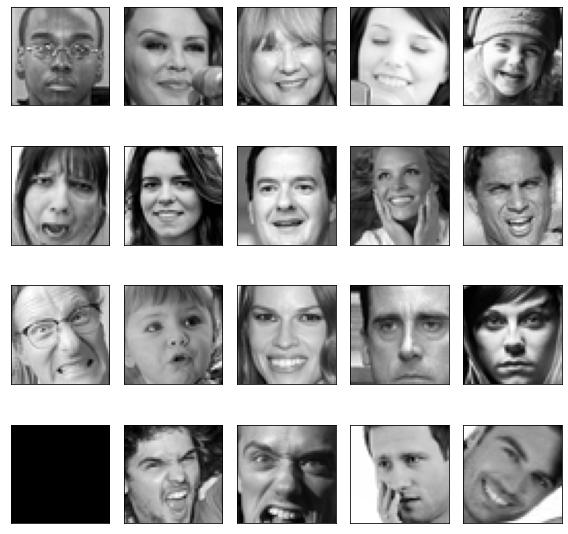

In [7]:
# show 25 images
img_helper(25, data.sample(n=20))

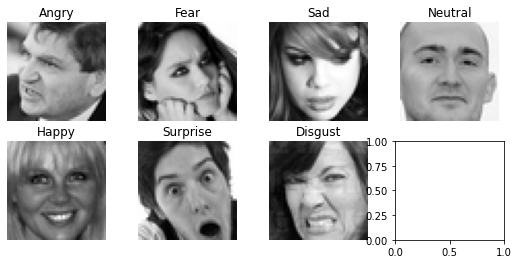

In [8]:
# show all the emotions
emotion_name = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}
unique_emotions = data.emotion.unique()

images = []
emotions = []
# select 1 image which matches each emotion
for emotion in unique_emotions:
    emotion_df = data[data.emotion == emotion].sample(n=1)
    emotions.append(emotion)
    
    pixels = emotion_df['pixels']
    images.append(extract_pixels(pixels.to_list()[0]))
    
cols = 4
fig, ax = plt.subplots(len(images) // cols + 1, cols, figsize=(9,4))
for i,img in enumerate(images):
    row = i // cols
    col = i % cols
    ax[row, col].imshow(img, cmap=matplotlib.cm.gray)
    ax[row, col].axis('off')
    ax[row, col].set_title(emotion_name[emotions[i]])

In [9]:
# view distributions of emotions
emotion_counts = data['emotion'].value_counts().sort_index()
emotion_counts

0    4953
1     547
2    5121
3    8989
4    6077
5    4002
6    6198
Name: emotion, dtype: int64

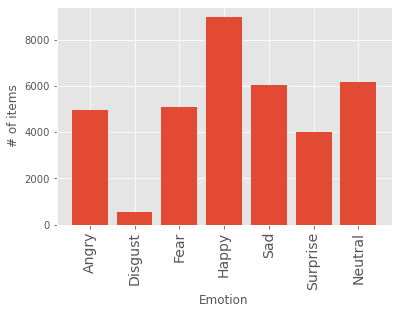

In [42]:
plt.bar(range(0, len(emotion_counts)), emotion_counts)
plt.ylabel('# of items')
plt.xlabel('Emotion')
plt.xticks(np.arange(7), [emotion_name[i] for i in range(len(emotion_counts))], rotation=90, fontsize=14)
plt.show()